#  Plotting with `pandas`


Pandas provides built-in plotting capabilities that make it easy to visualize data stored in DataFrames and Series. It leverages the `matplotlib` library under the hood, allowing users to create a variety of plots with minimal code.

The framework for plotting is data-centric, meaning that plots are generated directly from the data structures in pandas. This allows for quick and efficient visualization of data without needing to manually extract and format data for plotting. 

Compared to what you have already seen in `matplotlib`, pandas plotting is often more straightforward and requires less boilerplate code. It means, however, that fine tuning is sometimes less flexible than using `matplotlib` directly.

## Plotting with Series

The basic `pandas` object is the Series. Series have a `.plot()` method that can be used to create various types of plots.

A    10
B    25
C    15
D    30
E    20
dtype: int64


<Axes: >

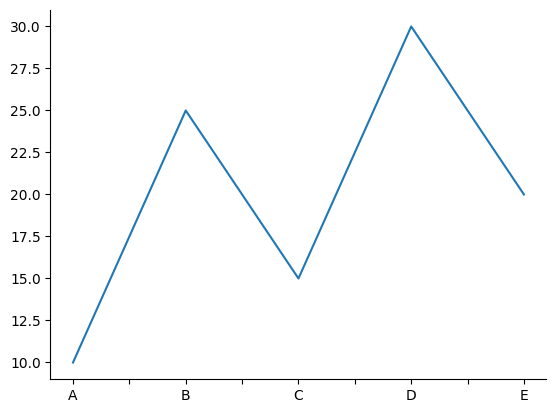

In [2]:
import pandas as pd


# Create an example series
series = pd.Series([10, 25, 15, 30, 20], index=['A', 'B', 'C', 'D', 'E'])
print(series)

series.plot()

We notice a few features:

- the `plot()` method is called directly on the pandas object (in this case, a Series).
- without any additional arguments, it defaults to a line plot and it uses:
    - the index of the Series for the x-axis,
    - the values of the Series for the y-axis.
- labels are inferred automatically for the axes (in this case the categorical names of the x-axis)


The `.plot()` method has various parameters. The most important one is `kind`, which specifies the type of plot to create. Some common plot types include: 
- `'line'`: Line plot (default)
- `'bar'`: Vertical bar plot
- `'barh'`: Horizontal bar plot
- `'hist'`: Histogram
- `'box'`: Box plot
- `'scatter'`: Scatter plot (requires `x` and `y` parameters)
- `'pie'`: Pie chart

Other parameters allow customization of the plot, such as titles, labels, colors, and more.

Let's see some examples:

<Axes: title={'center': 'Bar Plot of Series'}, xlabel='Categories', ylabel='Values'>

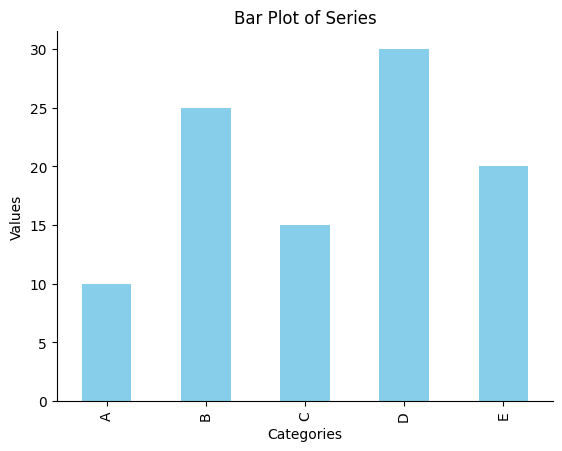

In [3]:
series.plot(kind='bar', title='Bar Plot of Series', color='skyblue', xlabel='Categories', ylabel='Values')

<Axes: title={'center': 'Pie Chart of Series'}>

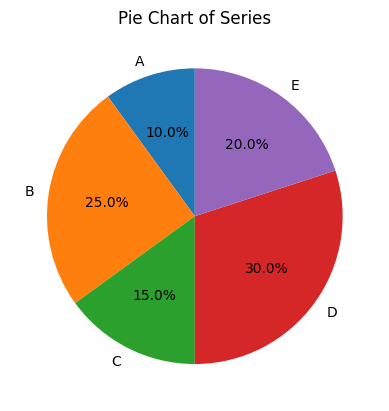

In [6]:
series.plot(kind='pie', title='Pie Chart of Series', autopct='%1.1f%%', startangle=90)

A **box** plot is diffeeent is it allows one to view the distribution of the data in a simplified form: it shows the median, quartiles, and potential outliers of the data i a single plot.

<Axes: title={'center': 'Box Plot of Series'}>

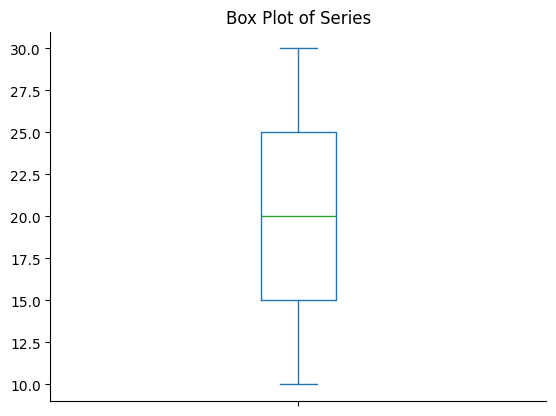

In [4]:
series.plot(kind='box', title='Box Plot of Series')

## Plotting with DataFrames

As we have seen earlier, when working with `pandas` we typically use Dataframes (i.e. collections of Series). DataFrames also have a `.plot()` method that can be used to create various types of plots.

When plotting a DataFrame, the default behavior is to plot each column as a separate line (or bar, etc.) on the same axes. The index of the DataFrame is used for the x-axis.

<Axes: title={'center': 'Crop Yields Over Growing Season'}, xlabel='Month', ylabel='Yield (tons per hectare)'>

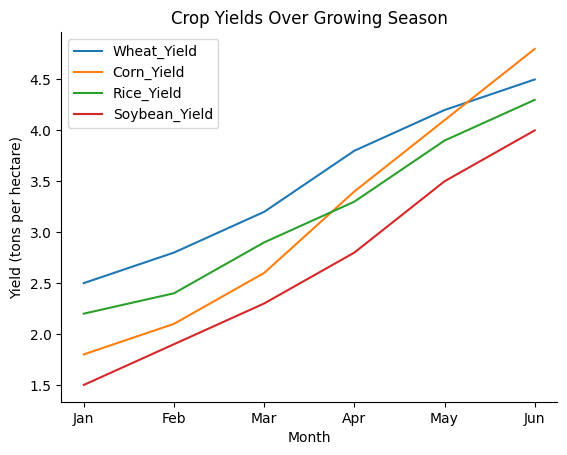

In [13]:
# Create a DataFrame with crop yield data across different months
df = pd.DataFrame({
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    'Wheat_Yield': [2.5, 2.8, 3.2, 3.8, 4.2, 4.5],
    'Corn_Yield': [1.8, 2.1, 2.6, 3.4, 4.1, 4.8],
    'Rice_Yield': [2.2, 2.4, 2.9, 3.3, 3.9, 4.3],
    'Soybean_Yield': [1.5, 1.9, 2.3, 2.8, 3.5, 4.0]
})


# Plot the DataFrame
df.plot(x='Month', kind='line', 
        title='Crop Yields Over Growing Season', 
        xlabel='Month', ylabel='Yield (tons per hectare)')


Notice that we obly had to specify the variable on the x-axis and pandas inferred the res, consructing a legend automatically.

You can have more control and specify which columns to plot on the x and y axes using the `x` and `y` parameters.

<Axes: title={'center': 'Crop Yields Over Growing Season'}, xlabel='Month', ylabel='Yield (tons per hectare)'>

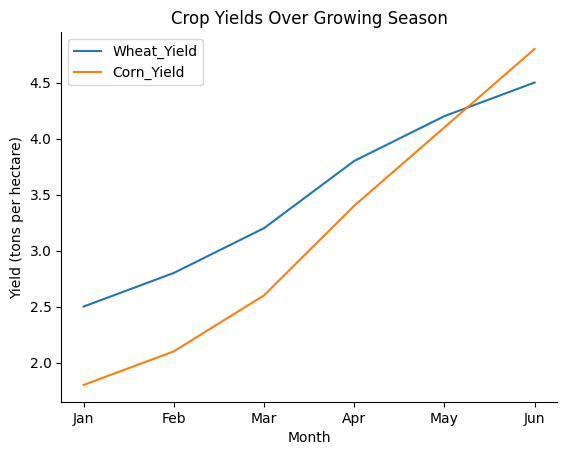

In [16]:
df.plot( kind='line',
        x='Month',
        y=['Wheat_Yield', 'Corn_Yield'],
        title='Crop Yields Over Growing Season', 
        xlabel='Month', ylabel='Yield (tons per hectare)')

Suppose we also wanted the data points to be marked with circles, we could use the `style` parameter:

<Axes: title={'center': 'Crop Yields Over Growing Season'}, xlabel='Month', ylabel='Yield (tons per hectare)'>

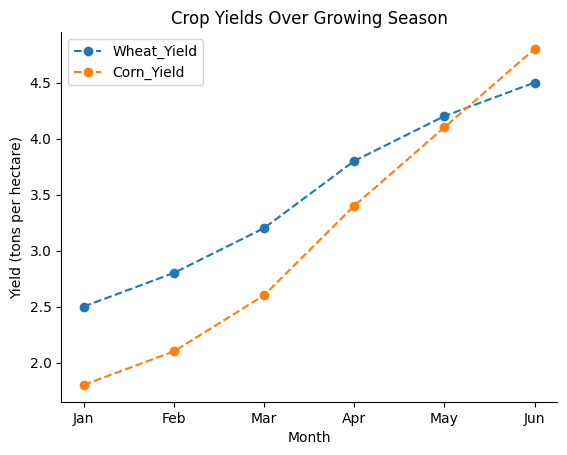

In [18]:
df.plot( kind='line',
        style='--o',
        x='Month',
        y=['Wheat_Yield', 'Corn_Yield'],
        title='Crop Yields Over Growing Season', 
        xlabel='Month', ylabel='Yield (tons per hectare)')

Additional parameters can be used to tune the figure property, e.g. the figure size:

<Axes: title={'center': 'Crop Yields Over Growing Season'}, xlabel='Month', ylabel='Yield (tons per hectare)'>

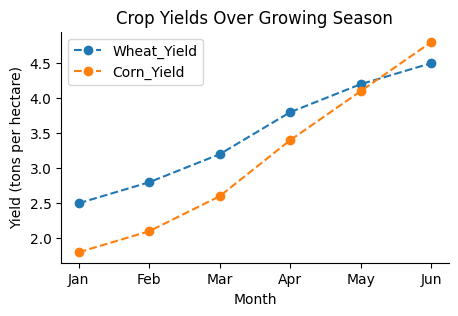

In [20]:
df.plot( kind='line',
        style='--o',
        x='Month',
        y=['Wheat_Yield', 'Corn_Yield'],
        title='Crop Yields Over Growing Season', 
        xlabel='Month', ylabel='Yield (tons per hectare)',
        figsize=(5,3))

## Subplots

In `matplotlib`, one can create multiple axes in a single figure using subplots. Pandas also supports this functionality through the `subplots` parameter in the `.plot()` method.

When `subplots=True` is specified, each column of the DataFrame is plotted in its own subplot.

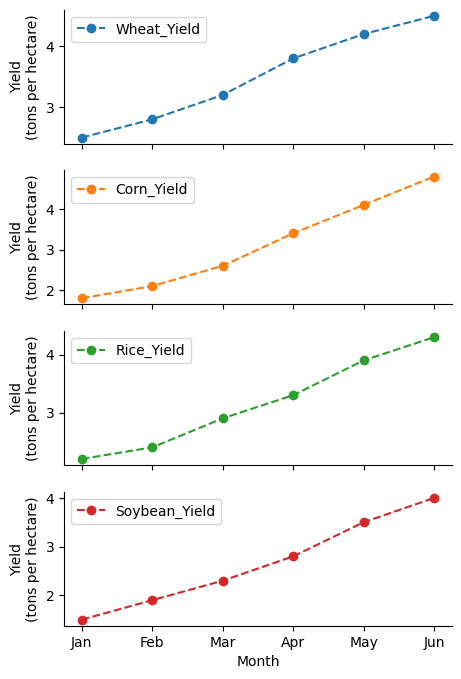

In [ ]:
df.plot( kind='line',
        style='--o',
        x='Month',
        xlabel='Month', 
        ylabel='Yield\n(tons per hectare)',
        subplots=True,
        figsize=(5,8)
        
        )

We can specify the structure of the subplot grid using the `layout` parameter, which takes a tuple indicating the number of rows and columns.

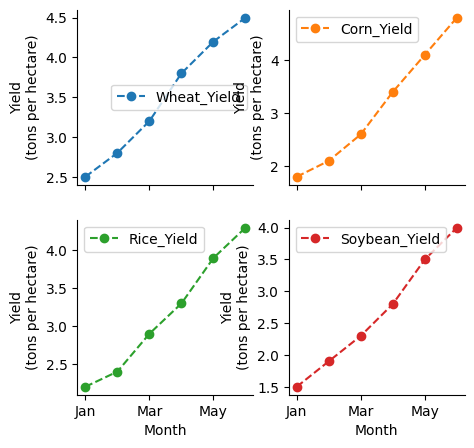

In [41]:
df.plot( kind='line',
        style='--o',
        x='Month',
        xlabel='Month', 
        ylabel='Yield\n(tons per hectare)',
        subplots=True,
        layout =(2,2),
        figsize=(5,5)
        
        );

But what if we want to refine the individual subplots? For example, we may be unhappy with the labels of the various plots here. We need to store the results of the plotting operation and then modify each axis individually.

The result of the `.plot()` method when `subplots=True` is an array of `matplotlib` Axes objects, which can be further customized.

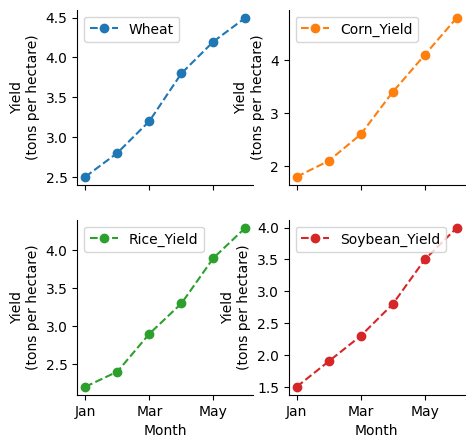

In [56]:
# capturing the Axes object
axes = df.plot( kind='line',
        style='--o',
        x='Month',
        xlabel='Month', 
        ylabel='Yield\n(tons per hectare)',
        subplots=True,
        layout =(2,2),
        figsize=(5,5)
        )

# modify the label in the first subplot
axes[0,0].get_lines()[0].set_label('Wheat')  # we use get_lines() to access the line objects, pick the first (and only ) one, and set its label

axes[0,0].legend()  # then we need to call legend() to update the legend with the new label

It is clear that in this sense, it may be useful to think of **good column names** when planning to plot data from a DataFrame.

## Working with time series data


### World population over time

As mentioned in the previous chapter, `pandas` has an exceptional support for time series data. This extends to plotting as well.

When plotting time series data, `pandas` automatically handles the date formatting on the x-axis, making it easy to visualize trends over time.

We are going to see this by using datsets from [Our World in Data](https://ourworldindata.org/), an excellent resource for open data on a variety of topics. These are provided as downloadable CSV files that can be easily loaded into pandas DataFrames.


For EXAMPLE, let us take the world population data.

In [3]:
import pandas as pd

df_population = pd.read_csv("https://ourworldindata.org/grapher/population.csv?v=1&csvType=full&useColumnShortNames=true")
df_population

,Entity,Code,Year,population_historical
0,Afghanistan,AFG,-10000,14737
1,Afghanistan,AFG,-9000,20405
2,Afghanistan,AFG,-8000,28253
3,Afghanistan,AFG,-7000,39120
4,Afghanistan,AFG,-6000,54166
...,...,...,...,...
58819,Zimbabwe,ZWE,2019,15271377
58820,Zimbabwe,ZWE,2020,15526887
58821,Zimbabwe,ZWE,2021,15797220
58822,Zimbabwe,ZWE,2022,16069061


The dataset contains population estimates for various countries over time (from 10000 BCE to today!). , By default it is simply indexed by row number, so all countries are jumbled together. 

A simple operation we could do would be to filter the data for a specific country, say India, and then plot its population over time.

<Axes: title={'center': 'Population of India Over Time'}, xlabel='Year', ylabel='Population'>

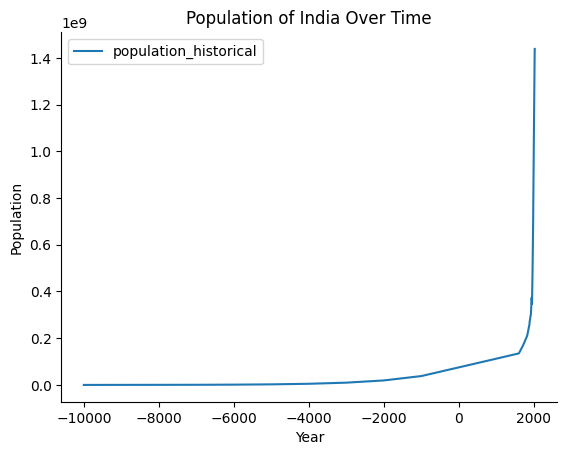

In [7]:
df_india = df_population[df_population['Entity'] == 'India']
df_india.plot(x='Year', y='population_historical', title='Population of India Over Time', xlabel='Year', ylabel='Population')

We can also select multiple countries to compare their population growth over time.

Notice however that we do not have distinct columns for each country, so we cannot use the DataFrame plotting capabilities directly.

A somewhat cumbersome way is to loop over the countries and plot each one individually on the same axes. for this, we need to store the axes object returned by the first plot call, and then pass it to the subsequent calls.)

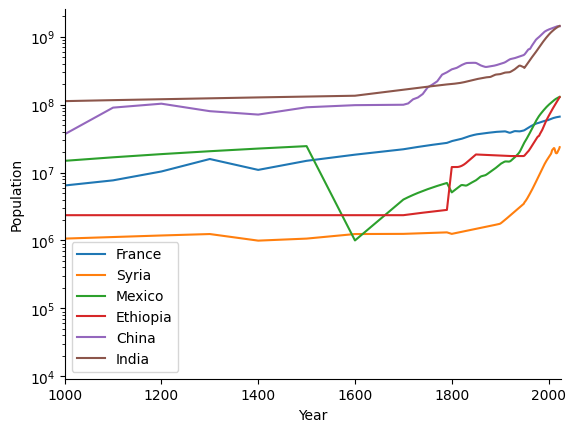

In [48]:
selection = ['France', 'Syria', 'Mexico','Ethiopia', 'China', 'India']
# set time range
time_range = (1000, 2025)

for i,country in enumerate(selection): #use enumerate to get both index and country
    df_country = df_population[df_population['Entity'] == country]
    if i == 0 :
        # store the axis
        axis =  df_country.plot(x='Year', y='population_historical',xlabel='Year', ylabel='Population',label=country, xlim=time_range,logy=True)
    else:
        df_country.plot(x='Year', y='population_historical', ax=axis, label=country,xlim=time_range,logy=True)  # pass the axis to plot on the existing axis


The plot above is rich: it provides a lot of information, it is tuned to plot only a specific time range and subset of data, it adapts the y-axis to a logarithmic scale to better visualize growth rates, and it includes labels and a legend for clarity.

However, it is a bit complex, withe explicit loops and multiple plot calls. 

There is a simpler way to achieve the same result by reshaping the DataFrame using the `pivot` method. This creates a new DataFrame where each country becomes a separate column, making it easier to plot multiple countries at once.

In [49]:
df_population_pivot = df_population.pivot(index='Year', columns='Entity', values='population_historical')

df_population_pivot

Entity,Afghanistan,Africa,Africa (UN),Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Americas (UN),Andorra,Angola,...,Wallis and Futuna,West Germany,Western Sahara,World,Yemen,Yemen Arab Republic,Yemen People's Republic,Yugoslavia,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
-10000,14737.0,2.289730e+05,NaN,NaN,1199.0,12090.0,NaN,NaN,25.0,379.0,...,NaN,NaN,NaN,4.501152e+06,981.0,NaN,NaN,NaN,668.0,749.0
-9000,20405.0,3.250040e+05,NaN,NaN,1999.0,20150.0,NaN,NaN,34.0,633.0,...,NaN,NaN,NaN,5.687125e+06,1963.0,NaN,NaN,NaN,1002.0,1124.0
-8000,28253.0,4.658270e+05,NaN,NaN,3332.0,33584.0,NaN,NaN,45.0,1055.0,...,NaN,NaN,NaN,7.314623e+06,3927.0,NaN,NaN,NaN,1503.0,1686.0
-7000,39120.0,6.741870e+05,NaN,NaN,5554.0,55973.0,NaN,NaN,61.0,1758.0,...,NaN,NaN,NaN,9.651703e+06,7855.0,NaN,NaN,NaN,2254.0,2529.0
-6000,54166.0,9.851950e+05,NaN,NaN,9256.0,93289.0,NaN,NaN,81.0,2930.0,...,NaN,NaN,NaN,1.327831e+07,15710.0,NaN,NaN,NaN,3381.0,3794.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,37856125.0,1.348006e+09,1.348005e+09,NaN,2885011.0,43294551.0,50230.0,1.017895e+09,76492.0,32375633.0,...,11711.0,NaN,538450.0,7.811294e+09,35111416.0,NaN,NaN,NaN,18513839.0,15271377.0
2020,39068977.0,1.380821e+09,1.380821e+09,NaN,2871950.0,44042094.0,49779.0,1.024464e+09,77397.0,33451139.0,...,11640.0,NaN,549374.0,7.887001e+09,36134867.0,NaN,NaN,NaN,19059394.0,15526887.0
2021,40000410.0,1.413753e+09,1.413753e+09,NaN,2849641.0,44761099.0,49249.0,1.029207e+09,78379.0,34532427.0,...,11590.0,NaN,558625.0,7.954448e+09,37140234.0,NaN,NaN,NaN,19603610.0,15797220.0


Now, plotting is straightforward, as we can directly use the DataFrame's `.plot()` method to visualize the population of multiple countries over time.

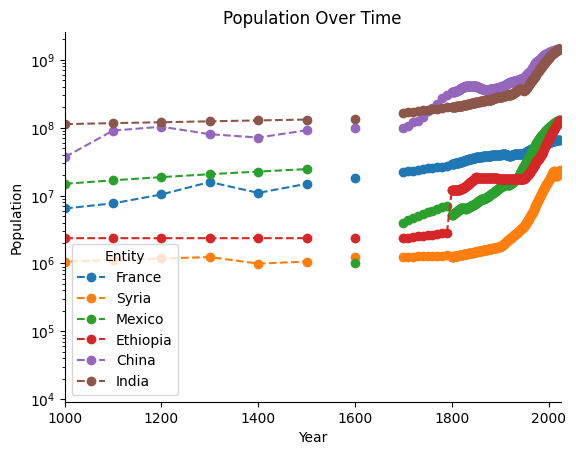

In [50]:
df_population_pivot.plot(y=selection, xlabel='Year', ylabel='Population', title='Population Over Time', xlim=time_range, logy=True, style='--o');

Notice, however, that we get some broken lines in the data. This is because the pivoting is producing NaN values for years where a country does not have data. By default, pandas does not plot these points, resulting in breaks in the lines.

The easy fix is to fill the NaN values, for example via **interpolation** (which we mentioned [previously](../14/lecture_pandas_preprocessing.ipynb)). This can be done *one the fly*.

<Axes: title={'center': 'Population Over Time'}, xlabel='Year', ylabel='Population'>

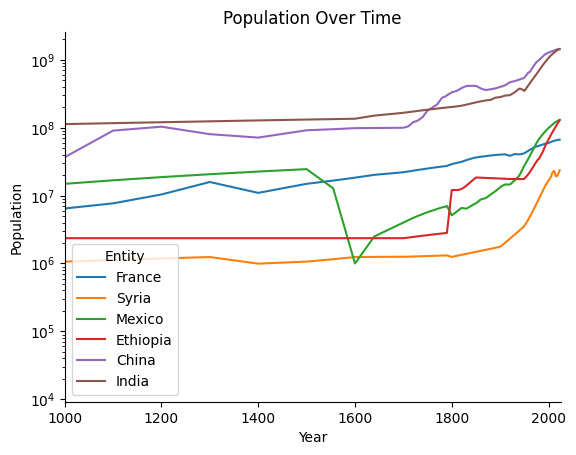

In [51]:
df_population_pivot.interpolate(kind="linear").plot(y=selection, xlabel='Year', ylabel='Population', title='Population Over Time', xlim=time_range, logy=True, )

Notice the structure of the pivoted dataframe

In [52]:
df_population_pivot

Entity,Afghanistan,Africa,Africa (UN),Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Americas (UN),Andorra,Angola,...,Wallis and Futuna,West Germany,Western Sahara,World,Yemen,Yemen Arab Republic,Yemen People's Republic,Yugoslavia,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
-10000,14737.0,2.289730e+05,NaN,NaN,1199.0,12090.0,NaN,NaN,25.0,379.0,...,NaN,NaN,NaN,4.501152e+06,981.0,NaN,NaN,NaN,668.0,749.0
-9000,20405.0,3.250040e+05,NaN,NaN,1999.0,20150.0,NaN,NaN,34.0,633.0,...,NaN,NaN,NaN,5.687125e+06,1963.0,NaN,NaN,NaN,1002.0,1124.0
-8000,28253.0,4.658270e+05,NaN,NaN,3332.0,33584.0,NaN,NaN,45.0,1055.0,...,NaN,NaN,NaN,7.314623e+06,3927.0,NaN,NaN,NaN,1503.0,1686.0
-7000,39120.0,6.741870e+05,NaN,NaN,5554.0,55973.0,NaN,NaN,61.0,1758.0,...,NaN,NaN,NaN,9.651703e+06,7855.0,NaN,NaN,NaN,2254.0,2529.0
-6000,54166.0,9.851950e+05,NaN,NaN,9256.0,93289.0,NaN,NaN,81.0,2930.0,...,NaN,NaN,NaN,1.327831e+07,15710.0,NaN,NaN,NaN,3381.0,3794.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,37856125.0,1.348006e+09,1.348005e+09,NaN,2885011.0,43294551.0,50230.0,1.017895e+09,76492.0,32375633.0,...,11711.0,NaN,538450.0,7.811294e+09,35111416.0,NaN,NaN,NaN,18513839.0,15271377.0
2020,39068977.0,1.380821e+09,1.380821e+09,NaN,2871950.0,44042094.0,49779.0,1.024464e+09,77397.0,33451139.0,...,11640.0,NaN,549374.0,7.887001e+09,36134867.0,NaN,NaN,NaN,19059394.0,15526887.0
2021,40000410.0,1.413753e+09,1.413753e+09,NaN,2849641.0,44761099.0,49249.0,1.029207e+09,78379.0,34532427.0,...,11590.0,NaN,558625.0,7.954448e+09,37140234.0,NaN,NaN,NaN,19603610.0,15797220.0


The index is now the year, and each column corresponds to a country. This structure is ideal for plotting time series data for multiple entities.

However, at this stage, we are not truly leveraging the datetime capabilties of pandas since the index is still just integers representing years, as it can be easily verified

In [62]:
df_population_pivot.index.dtype

dtype('int64')

### Temperature anomalies - monthly data


Let us consider a more complex data set where data are provided on a monthly basis.

In [90]:
df_anomalies = pd.read_csv("https://ourworldindata.org/grapher/global-temperature-anomalies-by-month.csv?v=1&csvType=full&useColumnShortNames=false")
df_anomalies

,Entity,Code,Year,Temperature anomaly
0,April,NaN,1940,-0.604778
1,April,NaN,1941,-0.806757
2,April,NaN,1942,-0.803393
3,April,NaN,1943,-0.772172
4,April,NaN,1944,-0.630437
...,...,...,...,...
1026,September,NaN,2021,0.401365
1027,September,NaN,2022,0.349395
1028,September,NaN,2023,0.930606
1029,September,NaN,2024,0.727906


Here the data is organised in a very different way: each row corresponds to a specific month and year for a country, and the date information is split across two columns (`year` and `month`).

What if we want to plot the time series directly? This seems a bit complicated. Here `pandas` can come to the rescue.

What we want to do is to create a new dataframe that has a proper datetime index. We can do this by combining the `year` and `month` columns into a single datetime column using the `pd.to_datetime()` function.

The startegy is as follows:

- We aim to construct a time stamp in the format `YYYY-MM-DD` (year-month-day).
- we extract the year and month columns from the DataFrame, casting them to strings. we assume the day to be the first of each month (`'01'`).
- We concatenate these strings with hyphens to form a complete date string.
- We then convert this string to a datetime object using `pd.to_datetime()`.

In [91]:
df_anomalies['Time'] = pd.to_datetime(df_anomalies['Year'].astype(str) + '-' + df_anomalies['Entity'] + '-01', format='%Y-%B-%d') # constructing a datetime column

df_anomalies

,Entity,Code,Year,Temperature anomaly,Time
0,April,NaN,1940,-0.604778,1940-04-01
1,April,NaN,1941,-0.806757,1941-04-01
2,April,NaN,1942,-0.803393,1942-04-01
3,April,NaN,1943,-0.772172,1943-04-01
4,April,NaN,1944,-0.630437,1944-04-01
...,...,...,...,...,...
1026,September,NaN,2021,0.401365,2021-09-01
1027,September,NaN,2022,0.349395,2022-09-01
1028,September,NaN,2023,0.930606,2023-09-01
1029,September,NaN,2024,0.727906,2024-09-01


We can now set this new datetime column as the index of the DataFrame.

In [92]:
df_anomalies.set_index('Time', inplace=True)

Plotting should be trivial, shouldn't it?

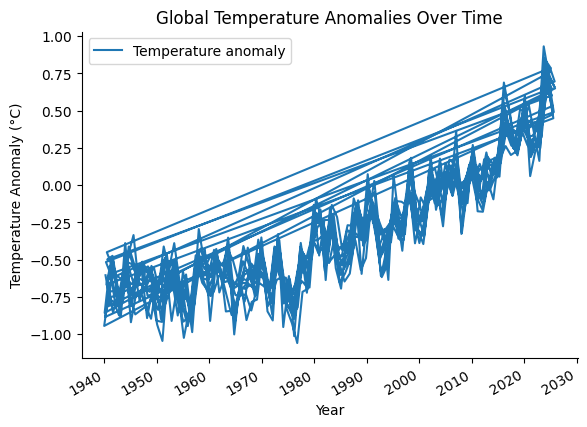

In [93]:
df_anomalies.plot(y='Temperature anomaly', title='Global Temperature Anomalies Over Time', xlabel='Year', ylabel='Temperature Anomaly (°C)');

What happened? The data is still sorted in the original order (alphabetically by month) we artificially connects the points produce the appearance of multiple jagged lines.

The solution is the simply sort the index before plotting.

In [94]:
df_anomalies.sort_index(inplace=True)

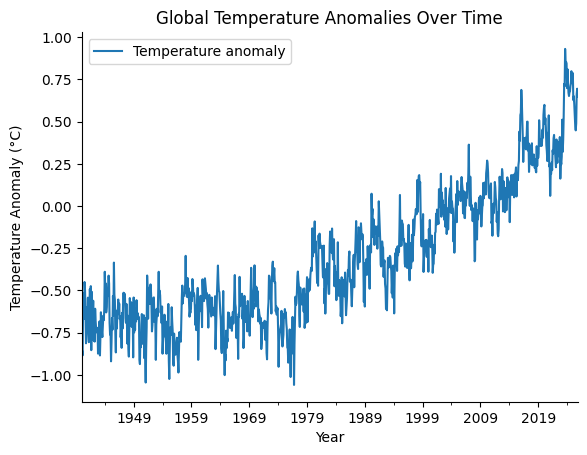

In [95]:
df_anomalies.plot(y='Temperature anomaly', title='Global Temperature Anomalies Over Time', xlabel='Year', ylabel='Temperature Anomaly (°C)');

## Smoothing the data 

The signal from the temperature anomalies is quite noisy. One way to better visualize trends in such data is to apply a smoothing technique, such as a **rolling mean**.

A **rolling mean** (or *moving average*) computes the average of a specified number of data points (the window) as it moves along the time series. This helps to smooth out short-term fluctuations and highlight longer-term trends.

Pandas focuses our attention on the overall workflow, so operations like smoothing are already built-in and easy to apply.

The idea in `pandas` is that moving averages are a particular case of the more general concept of **rolling windows**. A rolling window allows us to perform operations on a sliding window of data points.


For this, any dataframe or series has a `.rolling()` method that creates a rolling window object. We can then apply various aggregation functions to this object, such as `mean()`, `sum()`, etc.



Let'see how this works with out temperature anomalies data.

We can invoke the `.rolling()` method on the DataFrame, specifying the window size (e.g., 12 for a 12-month rolling mean). This produces a `Rolling` object, which, per se, does not contain any data yet.

In [98]:
df_anomalies.rolling(window=12)

Rolling [window=2,center=False,axis=0,method=single]

To actually perform a calculation we need to instruct the rolling object to compute something over the selected  window. For example, we can call the `mean()` method to compute the rolling mean. We do this via **chaining**: we call `.mean()` directly after `.rolling()`.

We do it only on the numerical data we care about (i.e. the temperature anomalies), excluding the non-numerical columns like the `Entity` (which is the month)

(Try and change the selection to include the `Entity` column and see what happens!)

In [115]:
df_anomalies['Temperature anomaly'].rolling(window=12).mean()

Time
1940-01-01         NaN
1940-02-01         NaN
1940-03-01         NaN
1940-04-01         NaN
1940-05-01         NaN
                ...   
2025-07-01    0.653466
2025-08-01    0.635043
2025-09-01    0.629563
2025-10-01    0.620916
2025-11-01    0.614314
Name: Temperature anomaly, Length: 1031, dtype: float64

Plotting can also be chained directly to the rolling mean calculation!

<Axes: xlabel='Time'>

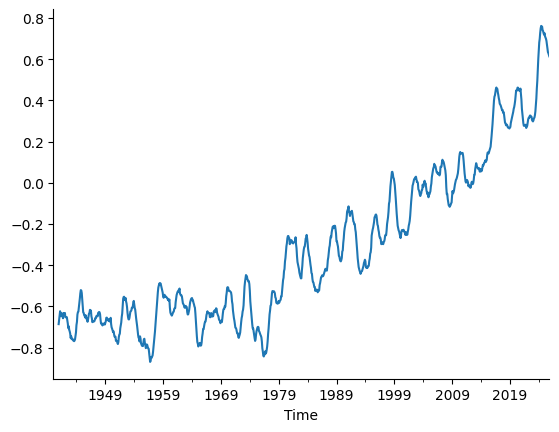

In [116]:
df_anomalies['Temperature anomaly'].rolling(window=12).mean().plot()

We can now produce a richer plot by combining several ideas we have seen in this lecture:

- we can plot the original noisy data on a fustom figure with specific size and labels
- we can overlay the smoothed data (rolling mean) on top of the original data for comparison at different levels of smoothing

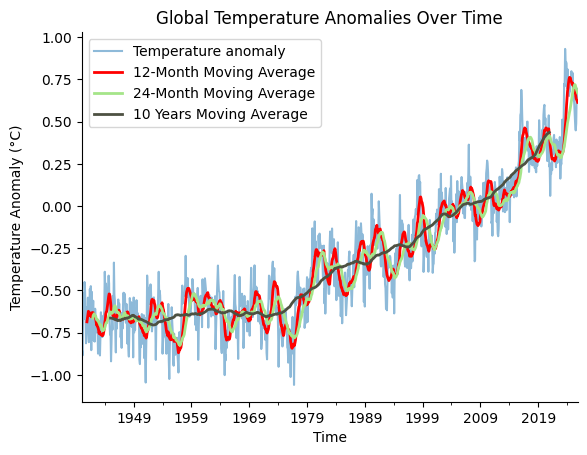

In [127]:
ax = df_anomalies.plot(y='Temperature anomaly', title='Global Temperature Anomalies Over Time', xlabel='Year', ylabel='Temperature Anomaly (°C)', alpha=0.5)
df_anomalies['Temperature anomaly'].rolling(window=12).mean().plot(ax=ax, color='red', linewidth=2, label='12-Month Moving Average')
df_anomalies['Temperature anomaly'].rolling(window=24).mean().plot(ax=ax, color="#A5E589", linewidth=2, label='24-Month Moving Average')
df_anomalies['Temperature anomaly'].rolling(window=120,center=True).mean().plot(ax=ax, color="#4D5142", linewidth=2, label='10 Years Moving Average') # notice we centred teh window here!
ax.legend()

## Saving the results

Finally, once we are happy with our plots, we may want to save them to files for later use or sharing. Pandas plotting returns a `matplotlib` Axes object, which can be used to save the figure using `matplotlib`'s `savefig()` function.

There are a couple of ways.


A first way is to use solely the axis object returned by the plot call. From the axis, we can get the figure using the `.figure` attribute, and then call `.savefig()` on it. In this case, we only use `pandas`.

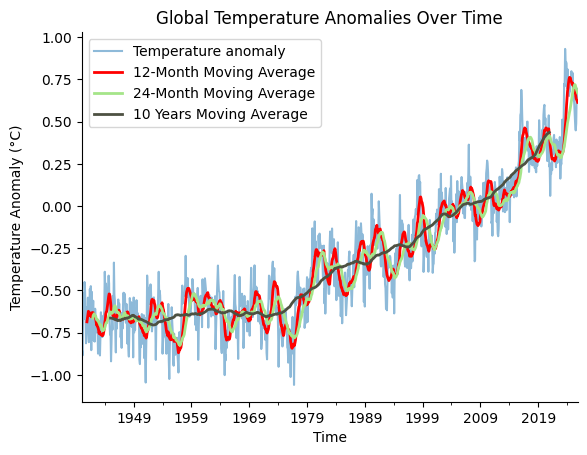

In [128]:
ax = df_anomalies.plot(y='Temperature anomaly', title='Global Temperature Anomalies Over Time', xlabel='Year', ylabel='Temperature Anomaly (°C)', alpha=0.5)
df_anomalies['Temperature anomaly'].rolling(window=12).mean().plot(ax=ax, color='red', linewidth=2, label='12-Month Moving Average')
df_anomalies['Temperature anomaly'].rolling(window=24).mean().plot(ax=ax, color="#A5E589", linewidth=2, label='24-Month Moving Average')
df_anomalies['Temperature anomaly'].rolling(window=120,center=True).mean().plot(ax=ax, color="#4D5142", linewidth=2, label='10 Years Moving Average') # notice we centred teh window here!
ax.legend()
ax.figure.savefig('temperature_anomalies.png', dpi=300)

Alternatively, we can import `matplotlib.pyplot` and use its `savefig()` function directly, passing the figure obtained from the axis object. This approach combines both `pandas` and `matplotlib`.

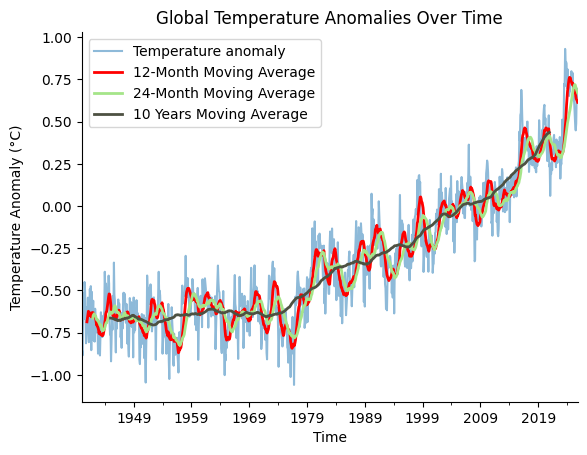

In [129]:
import matplotlib.pyplot as plt
ax = df_anomalies.plot(y='Temperature anomaly', title='Global Temperature Anomalies Over Time', xlabel='Year', ylabel='Temperature Anomaly (°C)', alpha=0.5)
df_anomalies['Temperature anomaly'].rolling(window=12).mean().plot(ax=ax, color='red', linewidth=2, label='12-Month Moving Average')
df_anomalies['Temperature anomaly'].rolling(window=24).mean().plot(ax=ax, color="#A5E589", linewidth=2, label='24-Month Moving Average')
df_anomalies['Temperature anomaly'].rolling(window=120,center=True).mean().plot(ax=ax, color="#4D5142", linewidth=2, label='10 Years Moving Average') # notice we centred teh window here!
ax.legend()
plt.savefig('temperature_anomalies-matplotlib.png', dpi=300)

This is a hint to a more general principle: since `pandas` plotting is built on top of `matplotlib`, any plot created with `pandas` can be further customized and manipulated using `matplotlib` functions and methods. This allows for greater flexibility and control over the final appearance of the plots.
